In [2]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt


def label_images(start_index, end_index, image_folder, output_file):
    distortion_criteria = ["lighting", "focus", "orientation", "color_calibration", "background", "resolution", "field_of_view"]
    scores = {}

    # Load existing data if it exists to append new scores
    if os.path.exists(output_file):
        with open(output_file, 'r') as file:
            scores = json.load(file)

    # Get all PNG images in the folder
    all_images = [f for f in os.listdir(image_folder) if f.endswith('.png')]
    selected_images = all_images[start_index:end_index]

    # Iterate through selected images
    for filename in selected_images:
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        image_scores = {}
        for criterion in distortion_criteria:
            valid_score = False
            while not valid_score:
                try:
                    score = float(input(f"Enter score (0-1) for {criterion}: "))
                    if 0 <= score <= 1:
                        image_scores[criterion] = score
                        valid_score = True
                    else:
                        print("Score must be between 0 and 1. Please try again.")
                except ValueError:
                    print("Invalid input. Please enter a numerical value.")
        
        scores[filename] = image_scores

    # Save/update the scores as a JSON file
    with open(output_file, "w") as json_file:
        json.dump(scores, json_file)

    print("Scores saved successfully.")

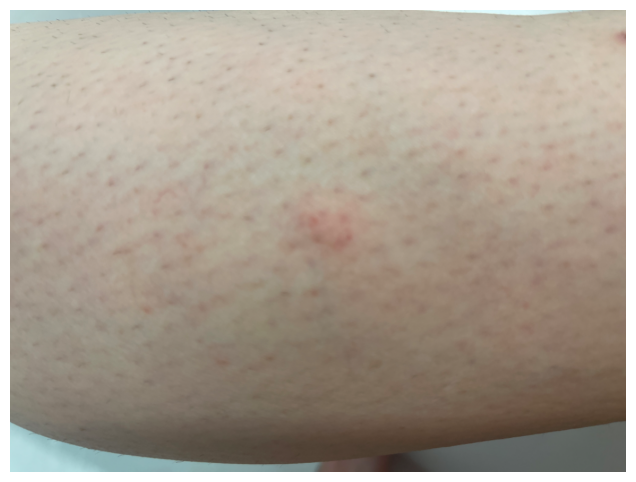

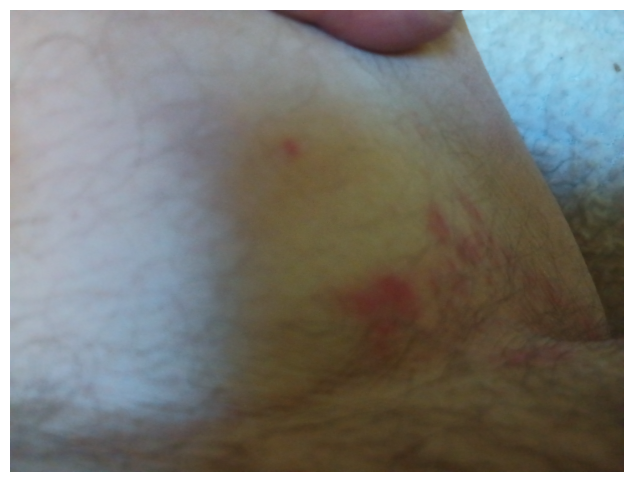

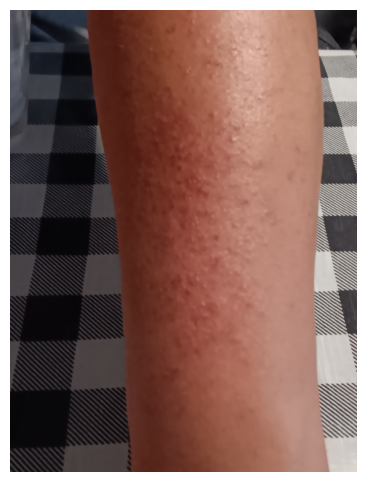

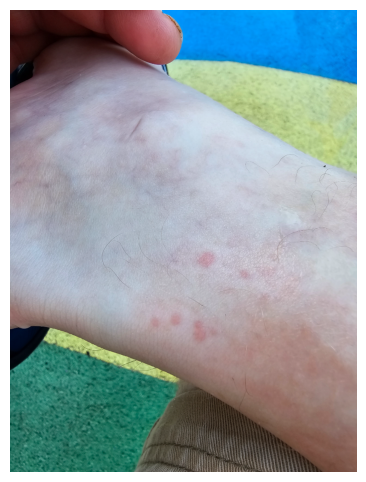

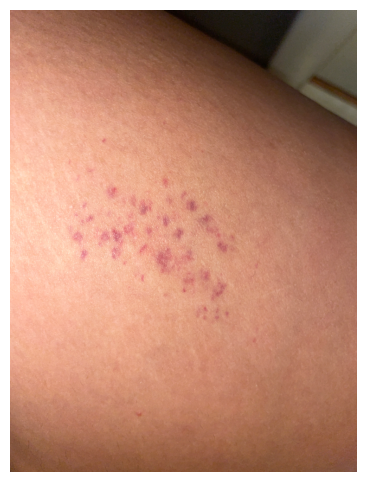

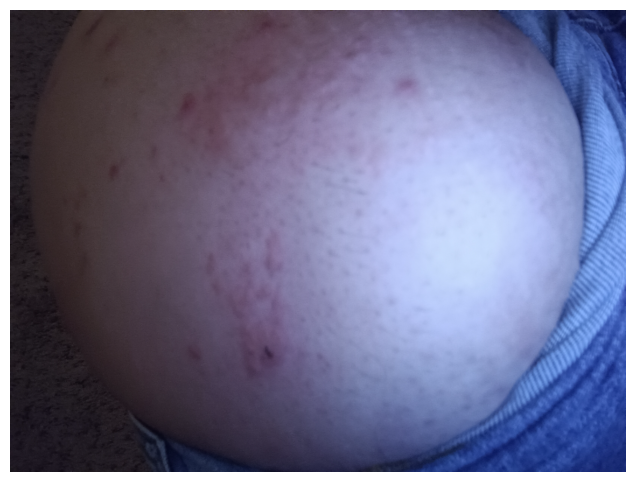

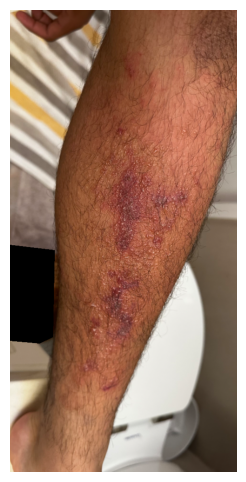

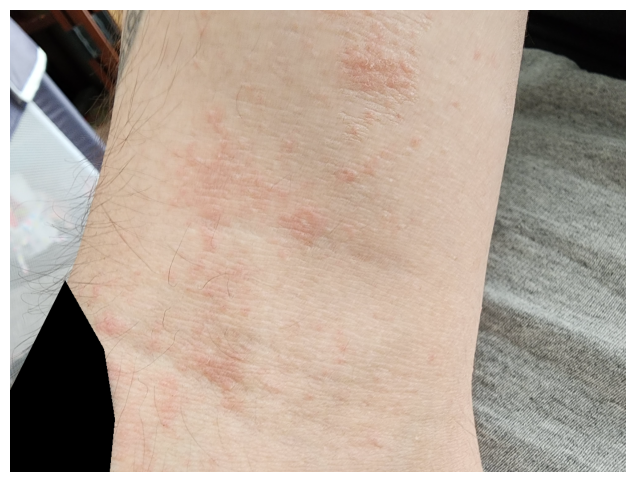

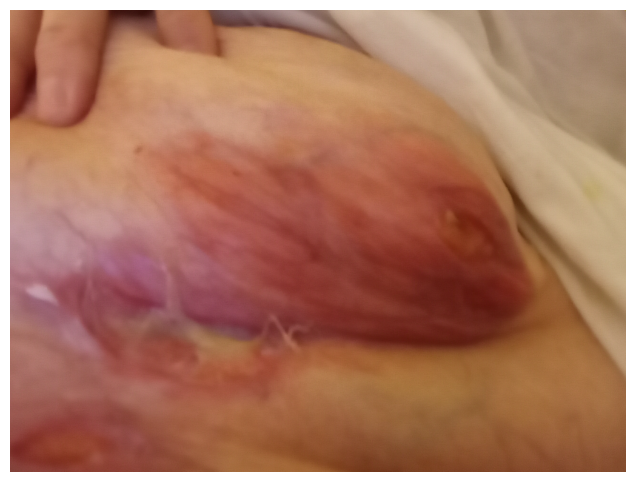

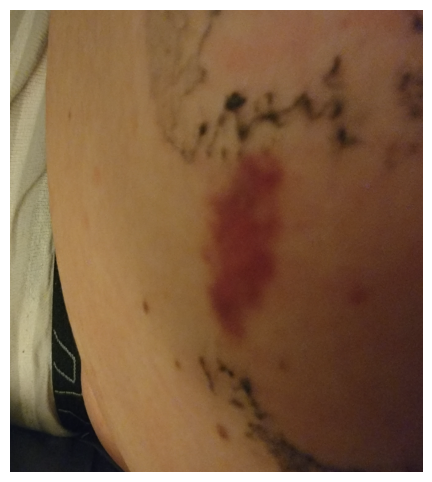

Scores saved successfully.


In [5]:
label_images(190, 200, "to_label", "scores.json")

In [6]:
import json

with open("scores.json", "r") as json_file:
    scores = json.load(json_file)
len(scores.keys())

200

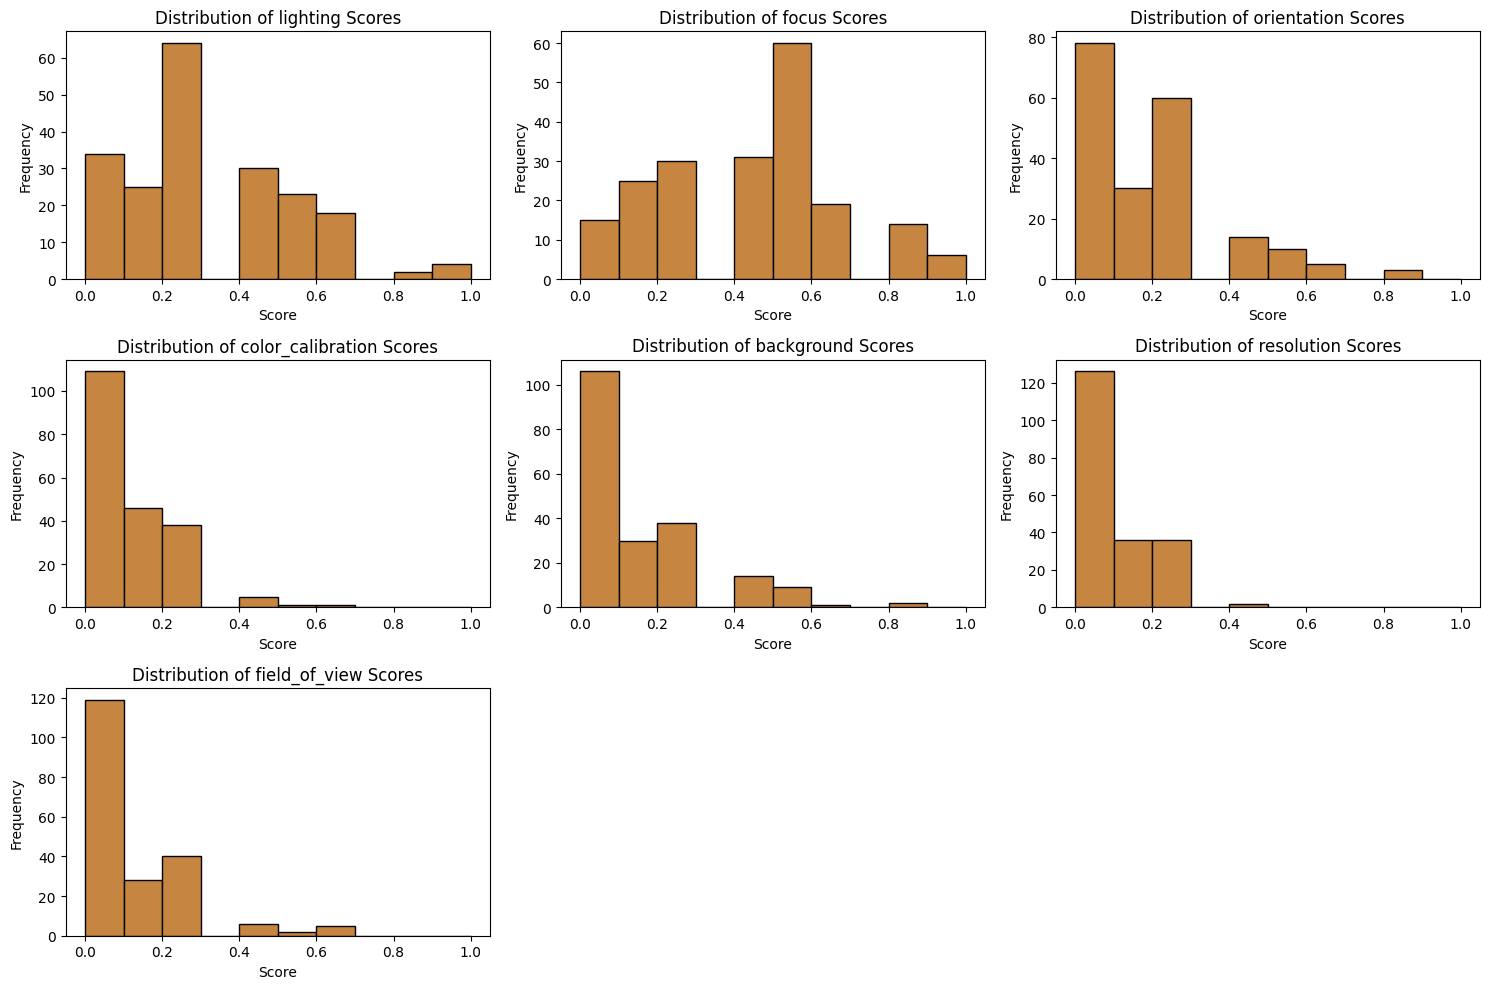

In [7]:
import json
import matplotlib.pyplot as plt

def plot_score_distribution(output_file):
    # Load the scores from the JSON file
    with open(output_file, 'r') as file:
        scores = json.load(file)

    distortion_criteria = ["lighting", "focus", "orientation", "color_calibration", "background", "resolution", "field_of_view"]

    # Prepare the data for plotting
    criteria_scores = {criterion: [] for criterion in distortion_criteria}
    for image_scores in scores.values():
        for criterion, score in image_scores.items():
            criteria_scores[criterion].append(score)

    # Plotting
    _, axs = plt.subplots(3, 3, figsize=(15, 10))  # Adjust the subplot grid as needed
    axs = axs.flatten()

    for idx, criterion in enumerate(distortion_criteria):
        axs[idx].hist(criteria_scores[criterion], bins=10, range=(0, 1), color='#C68642', edgecolor='black')
        axs[idx].set_title(f'Distribution of {criterion} Scores')
        axs[idx].set_xlabel('Score')
        axs[idx].set_ylabel('Frequency')

    # Hide any unused subplots
    for ax in axs[len(distortion_criteria):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage
plot_score_distribution('scores.json')


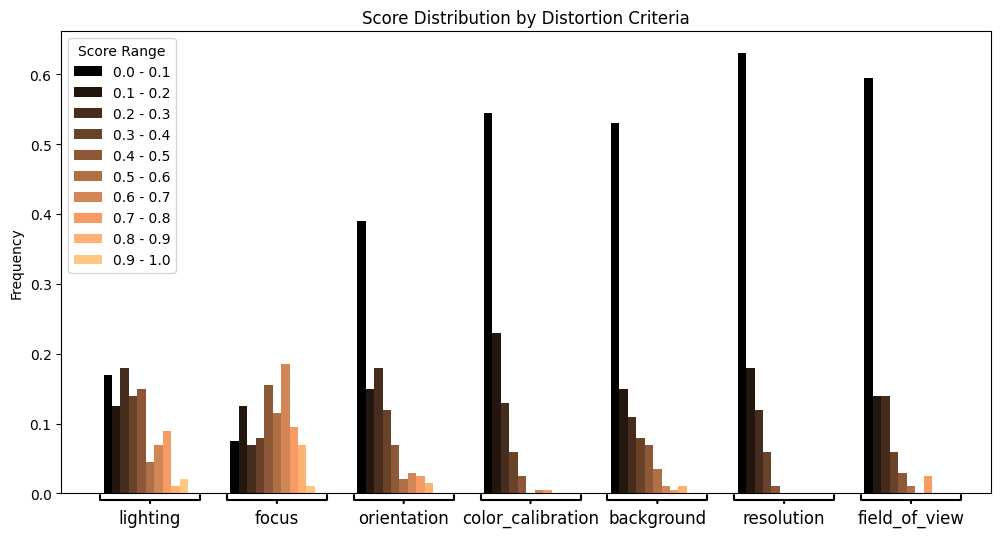

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc

def plot_grouped_distributions(output_file):
    # Load the scores from the JSON file
    with open(output_file, 'r') as file:
        scores = json.load(file)

    distortion_criteria = ["lighting", "focus", "orientation", "color_calibration", "background", "resolution", "field_of_view"]
    criteria_scores = {criterion: [] for criterion in distortion_criteria}

    for image_scores in scores.values():
        for criterion, score in image_scores.items():
            criteria_scores[criterion].append(score)

    # Number of bins for histogram
    num_bins = 10
    fig, ax = plt.subplots(figsize=(12, 6))

    # Total number of groups
    n_groups = len(distortion_criteria)

    # Create an index for each tick position
    indices = np.arange(n_groups) * 1.5  # Increase the gap between groups
    bar_width = 0.1

    # Create a color palette
    colors = plt.cm.copper(np.linspace(0, 1, num_bins))

    for i in range(num_bins):
        bin_range = (i / num_bins, (i + 1) / num_bins)
        bin_means = {
            criterion: np.mean([(bin_range[0] <= score < bin_range[1]) for score in scores])
            for criterion, scores in criteria_scores.items()
        }

        rects = ax.bar(indices + i * bar_width, list(bin_means.values()), bar_width,
                       label=f'{bin_range[0]:.1f} - {bin_range[1]:.1f}', color=colors[i])

    #ax.set_xlabel('Distortion Types')
    ax.set_ylabel('Frequency')
    ax.set_title('Score Distribution by Distortion Criteria')

    # Set the x-ticks to be in the middle of the groups
    ax.set_xticklabels([])  # Remove standard x-tick labels
    ax.tick_params(axis='x', length=0)  # Hide the ticks

    # Drawing curly braces with annotations
    for idx, criterion in enumerate(distortion_criteria):
        ax.annotate(criterion, (indices[idx] + num_bins * bar_width / 2, 0), xytext=(0, -11),
                    textcoords="offset points", ha='center', va='top', fontsize=12, arrowprops=dict(arrowstyle='-[, widthB=3.0, lengthB=0.3', lw=1.5, color='black', shrinkB=5))

    ax.legend(title="Score Range", loc='upper left')

    plt.show()

# Example usage
plot_grouped_distributions('scores.json')
